<a id='4.4.1.1'>
    <h2 style='font-size:180%;'>
        Train-Test Split</h2></a>

In [ ]:
# load dataset
d = pd.read_csv('source/d_num.csv')
d = d.values
x, y = d[:,1:], d[:,:1].ravel()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True, stratify=y)

In [14]:
print(f'Feature Dimension: {x.shape}\t Label Dimension: : {y.shape}')

Feature Dimension: (10127, 26)	 Label Dimension: : (10127,)


In [15]:
print(f'Percentage of Churn for the Full Data: {round(y.sum()/len(y),4)*100}%')

Percentage of Churn for the Full Data: 16.07%


In [16]:
print(f'Train Feature Dimension: {x_train.shape}\t Train Label Dimension: : {y_train.shape}')
print(f'Test Feature Dimension: {x_test.shape}\t Test Label Dimension: : {y_test.shape}')

Train Feature Dimension: (8101, 26)	 Train Label Dimension: : (8101,)
Test Feature Dimension: (2026, 26)	 Test Label Dimension: : (2026,)


In [17]:
print(f"""Percentage of Churn for Train Set: {round(y_train.sum()/len(y_train),4)*100}%
Percentage of Churn for Test Set: {round(y_test.sum()/len(y_test),4)*100}%""")

Percentage of Churn for Train Set: 16.07%
Percentage of Churn for Test Set: 16.04%


<a id='4.4.3'>
    <h2 style='font-size:180%;'>
        Logistic Regression</h2></a>

https://machinelearningmastery.com/selectively-scale-numerical-input-variables-for-machine-learning/

<a id='4.4.4'>
    <h2 style='font-size:180%;'>
        Model Attributes</h2></a>

In [18]:
print("Logistic Regression Parameters:")
LogisticRegression().get_params()

Logistic Regression Parameters:


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [19]:
LogisticRegression_params = LogisticRegression().get_params()
print(f"""Default Param Values:
  `C`:\t\t{LogisticRegression_params["C"]} 
  `solver`:\t{LogisticRegression_params["solver"]}
  `max_iter`:\t{LogisticRegression_params["max_iter"]}
     """)

Default Param Values:
  `C`:		1.0 
  `solver`:	lbfgs
  `max_iter`:	100
     


<a id='4.4.5'>
    <h2 style='font-size:180%;'>
        Model Fitting & Evaluation - Baseline</h2></a>

Notes on L1 and L2 regularization:
> *Inroducing a penalty to the sum of the weights means that the model has to "distribute" its weights optimally, so naturally most of this "resource" will go to the simple features that explain most of the variance, with complex features getting small or zero weights.*

[Edden Gerber, *Comment on a Medium Article*](https://medium.com/@edden.gerber/thanks-for-the-article-1003ad7478b2)

In [25]:
# define the modeling pipeline
model = LogisticRegression(solver='saga', class_weight='balanced', C=0.1, max_iter=10000, random_state=1)
scaler = MinMaxScaler()
pipeline = Pipeline([('s',scaler),('m',model)])

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model
m_scores = cross_validate(
    pipeline, x_train, y_train, 
    scoring=['accuracy','precision','recall','f1'], cv=cv, n_jobs=-1)

In [26]:
# summarize the results
fit_time = round(mean(m_scores['fit_time']), 4)
fit_time_sd = round(std(m_scores['fit_time']), 4)
score_time = round(mean(m_scores['score_time']), 4)
score_time_sd = round(std(m_scores['score_time']), 4)
accuracy = round(mean(m_scores['test_accuracy']), 4)
accuracy_sd = round(std(m_scores['test_accuracy']), 4)
precision = round(mean(m_scores['test_precision']), 4)
precision_sd = round(std(m_scores['test_precision']), 4)
recall = round(mean(m_scores['test_recall']), 4)
recall_sd = round(std(m_scores['test_recall']), 4)
f1 = round(mean(m_scores['test_f1']), 4)
f1_sd = round(std(m_scores['test_f1']), 4)

print("""Logistic Regression on Validation Set
      Fit Time:\t  %.2f (%.2f)
      Score Time:  %.2f (%.2f)
      Accuracy:\t  %.2f (%.2f)%% 
      Precision:  %.2f (%.2f)%%  
      Recall:\t  %.2f (%.2f)%%  
      F1 Score:\t  %.2f (%.2f)%%""" 
      % (fit_time, fit_time_sd,
         score_time, score_time_sd,
         accuracy*100, accuracy_sd,
         precision*100, precision_sd,
         recall*100, recall_sd,
         f1*100, f1_sd))

Logistic Regression on Validation Set
      Fit Time:	  0.18 (0.03)
      Score Time:  0.01 (0.01)
      Accuracy:	  84.68 (0.01)% 
      Precision:  51.54 (0.02)%  
      Recall:	  83.67 (0.04)%  
      F1 Score:	  63.73 (0.02)%


In [22]:
# model = LogisticRegression(solver='saga', class_weight='balanced', C=0.1, max_iter=10000, random_state=1)
# Logistic Regression on Validation Set
#       Fit Time:	  0.18 (0.03)
#       Score Time:  0.01 (0.01)
#       Accuracy:	  84.68 (0.01)% 
#       Precision:  51.54 (0.02)%  
#       Recall:	  83.67 (0.04)%  
#       F1 Score:	  63.73 (0.02)%

# model = LogisticRegression(solver='saga', class_weight='balanced', C=0.01, max_iter=10000, random_state=1)
# Logistic Regression on Validation Set
#       Fit Time:	  0.18 (0.02)
#       Score Time:  0.01 (0.00)
#       Accuracy:	  80.66 (0.01)% 
#       Precision:  44.24 (0.02)%  
#       Recall:	  78.09 (0.05)%  
#       F1 Score:	  56.45 (0.02)%

In [27]:
# make predictions on test dataset
model.fit(x_train, y_train)
yhat = model.predict(x_test)

In [ ]:
# evaluate predictions on test dataset
accuracy = round(accuracy_score(y_test, yhat), 4)
precision = round(precision_score(y_test, yhat), 4)
recall = round(recall_score(y_test, yhat), 4)
f_1 = round(f1_score(y_test, yhat), 4)
f_2 = round(fbeta_score(y_test, yhat, beta=2), 4)
print("""Logistic Regression on Test Set
      Accuracy:\t  %.2f%% 
      Precision:  %.2f%%  
      Recall:\t  %.2f%%  
      F1 Score:\t  %.2f%%
      F2 Score:\t  %.2f%%""" 
      % (accuracy*100, precision*100, recall*100, 
         f_1*100, f_2*100))

In [30]:
# model = LogisticRegression(solver='saga', class_weight='balanced', C=0.1, max_iter=10000, random_state=1)
# Logistic Regression on Test Set
#       Accuracy:	  79.12% 
#       Precision:  42.17%  
#       Recall:	  81.23%  
#       F1 Score:	  55.52%
#       F2 Score:	  68.54%

In [31]:
print(confusion_matrix(y_test, yhat))

[[1339  362]
 [  61  264]]


In [32]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.96      0.79      0.86      1701
         1.0       0.42      0.81      0.56       325

    accuracy                           0.79      2026
   macro avg       0.69      0.80      0.71      2026
weighted avg       0.87      0.79      0.81      2026



In [ ]:
# %% Use RandomSearchCV to tune parameters for ISO

# Takes a while to compute and uses a lot of CPU 
# https://stats.stackexchange.com/questions/186182/a-way-to-maintain-classifiers-recall-while-improving-precision
#model
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

print('Running RandomizedSearchCV')
# default IsolationForest but set random_state = 0 to keep consistent results
iso = IsolationForest(random_state=123)

# Implement RandomSearchCV

# Number of trees in random forest [100, 150,..., 500]
n_estimators = [int(x) for x in np.arange(start = 100, stop = 501, step = 50)]

# Number of features to consider at every split
max_features = [int(x) for x in np.arange(start = 1, stop = x_train.shape[1]+1, step = 1)]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'bootstrap': bootstrap}
scoreFunction = {"recall": "recall"}

# run a RandomizedSearchCV with 3 folds and 25 iterations 
random_search = RandomizedSearchCV(iso,
                                   param_distributions = random_grid,
                                   n_iter = 25,
                                   scoring = scoreFunction,               
                                   refit = "recall",
                                   return_train_score = False,
                                   random_state = 0,
                                   verbose = 2,
                                   cv = 5,
                                   n_jobs = -1) 

# trains and optimizes the model
random_search.fit(x_train, y_train)

print('Finished RandomizedSearchCV ')

In [ ]:
print("Improved Model from RandomizedSearchCV")
iso_search = random_search.best_estimator_
iso_search.set_params(random_state=0)
print(iso_search.get_params())
evaluate(iso_search,x_test,y_test)

<a id='7.1.2.1'>
    <h2 style='font-size:150%;'>
        Gradient Boosting Classifier
    </h2>
</a>

<a id='7.1.2.2'>
    <h2 style='font-size:150%;'>
        Logistic Regression
    </h2>
</a>

<a id='7.2'>
    <h2 style='font-size:210%;'>
        One-Class SVM
    </h2>
</a>

The SVM algorithm originally developed for binary classification also has a use for detecting outliers. When modeling one class, the algorithm calculates the probability density function of the majority class and marks exmples on both extremes of the function as outliers. The class provides the argument `nu` which is equivalent of the percentage of outliers just like the argument `contamination` in `iso()`. 

The main difference from a standard SVM is that One-Class SVM takes an unsupervised approach as it does not provide normal hyperparameters for tuning the margin like C. Instead, the argument `nu` is used to control the sensitivity of the support vectors and define the percentage of outliers just like the argument `contamination` in `iso()`.

<a id='7.2.1'>
    <h2 style='font-size:180%;'>
        Fit on All Classes
    </h2>
</a>

In [ ]:
# from sklearn.svm import OneClassSVM

<h2 style='font-size:150%;'>
    Train-Test Split
</h2>

In [90]:
d = pd.read_csv('source/d_num.csv')
d = d.values
x = d[:,1:]
y = d[:,:1].ravel()

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [92]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(8101, 26) (8101,)
(2026, 26) (2026,)


<h2 style='font-size:150%;'>
    Model Attributes
</h2>

In [93]:
OneClassSVM().get_params()

{'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'nu': 0.5,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [94]:
# %%timeit
ocsvm = OneClassSVM(nu=0.01)

In [95]:
yhat = ocsvm.fit_predict(x_train)

In [96]:
len(yhat)

8101

In [97]:
print(x_train.shape, yhat.shape)

(8101, 26) (8101,)


In [98]:
x_train, y_train = x_train[yhat!=-1,:], y_train[yhat!=-1]
print(x_train.shape, y_train.shape)

(8022, 26) (8022,)


In [99]:
len(x_train)/8101

0.990248117516356

In [100]:
y_test.shape

(2026,)

<a id='7.2.1.1'>
    <h2 style='font-size:150%;'>
        Gradient Boosting Classifier
    </h2>
</a>

In [ ]:
%%timeit
rd.seed(1)
gb = GradientBoostingClassifier(n_estimators=300, max_depth=3, learning_rate=0.1)
gb.fit(x_train, y_train)
yhat = gb.predict(x_test)
accuracy = round(accuracy_score(y_test, yhat), 3)
precision = round(precision_score(y_test, yhat), 3)
recall = round(recall_score(y_test, yhat), 3)

In [101]:
rd.seed(1)
gb = GradientBoostingClassifier(n_estimators=300, max_depth=3, learning_rate=0.1)
gb.fit(x_train, y_train)
yhat = gb.predict(x_test)

In [102]:
# evaluate predictions on test dataset
accuracy = round(accuracy_score(y_test, yhat), 4)
precision = round(precision_score(y_test, yhat), 4)
recall = round(recall_score(y_test, yhat), 4)
f_1 = round(f1_score(y_test, yhat), 4)
f_2 = round(fbeta_score(y_test, yhat, beta=2), 4)
print("""Gradient Boosting Classifier on Test Set
      Accuracy:\t  %.2f%% 
      Precision:  %.2f%%  
      Recall:\t  %.2f%%  
      F1 Score:\t  %.2f%%
      F2 Score:\t  %.2f%%""" 
      % (accuracy*100, precision*100, recall*100, 
         f_1*100, f_2*100))

Gradient Boosting Classifier on Test Set
      Accuracy:	  97.98% 
      Precision:  94.10%  
      Recall:	  93.23%  
      F1 Score:	  93.66%
      F2 Score:	  93.40%


In [ ]:
print(confusion_matrix(y_test, yhat))

In [ ]:
print(classification_report(y_test, yhat))

***Note:***

* The baseline model yielded:
    * Gradient Boosting Classifier -- Accuracy: 0.972 / Precision: 0.93 / Recall: 0.895
* `iso()` with 5% contamination yielded results slightly better results overall:
    * Gradient Boosting Classifier -- Accuracy: 0.974 / Precision: 0.939 / Recall: 0.898
* `LocalOutlierFactor()` with no hyperparameter tuning:
    * Gradient Boosting Classifier -- Accuracy: 0.974 / Precision: 0.939 / Recall: 0.898
* `OneClassSVM()` with nu = 0.05, 0.03, 0.01:
    * Gradient Boosting Classifier -- Accuracy: 0.971 / Precision: 0.929 / Recall: 0.886
    * Gradient Boosting Classifier -- Accuracy: 0.972 / Precision: 0.935 / Recall: 0.886
    * Gradient Boosting Classifier -- Accuracy: 0.973 / Precision: 0.936 / Recall: 0.895

<a id='7.1.2'>
    <h2 style='font-size:180%;'>
        Fit on Majority Class
    </h2>
</a>

ignore the task of discrimination and instead focus on deviations from normal or what is expected.

This solution has proven to be especially useful when the minority class lack any structure, being predominantly composed of small disjuncts or noisy instances.

[Page 139, Learning from Imbalanced Data Sets, 2018.](https://www.amazon.com/Learning-Imbalanced-Data-Alberto-Fern%C3%A1ndez/dp/3319980734)

One must remember that the advantages of one-class classifiers come at a price of discarding all of available information about the majority class. Therefore, this solution should be used carefully and may not fit some specific applications.

[Page 140, Learning from Imbalanced Data Sets, 2018.](https://www.amazon.com/Learning-Imbalanced-Data-Alberto-Fern%C3%A1ndez/dp/3319980734)

In [ ]:
# load dataset
d = pd.read_csv('source/d_num.csv')
d = d.values
x, y = d[:,1:], d[:,:1].ravel()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True, stratify=y)

In [ ]:
# fit only on existing customers (majority class)
x_train = x_train[y_train==0]
y_train = y_train[y_train==0]

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

In [ ]:
# mark inliers = 1
y_train[y_train==0] = 1

In [ ]:
# mark inliers = 1, outliers = -1
y_test[y_test==1] = -1
y_test[y_test==0] = 1

In [ ]:
# examine shape
print(x_train.shape, y_train.shape)

<a id='4.2'>
    <h2 style='font-size:180%;'>
        Spearman's Rank Correlation</h2></a>

This statistical method quantifies the degree to which ranked variables are associated by a monotonic function, meaning an increasing or decreasing relationship. As a statistical hypothesis test, the method assumes that the samples are uncorrelated (fail to reject H0).

[Source: Machine Learning Mastery - How to Calculate Nonparametric Rank Correlation in Python](https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/)

In [36]:
spearman_churn = d.rank().corr(method='spearman')['churn']

In [47]:
print('Correlation Coefficient Using Spearman\'s Rank Correlation')
spearman_churn.sort_values(ascending=False)

Correlation Coefficient Using Spearman's Rank Correlation


churn                1.00
contr_ct_r12         0.19
mo_inactive_r12      0.17
opentobuy_avg_r12    0.03
dependents           0.02
marstat_Single       0.02
age                  0.02
mo_on_book           0.02
card_Platinum        0.01
marstat_Unknown      0.01
educ                 0.01
card_Gold            0.01
card_Blue            0.00
marstat_Divorced     0.00
tx_amt_pertx_r12    -0.01
card_Silver         -0.01
inc                 -0.02
marstat_Married     -0.02
gender              -0.04
credlim_avg_r12     -0.05
chng_tx_amt_q4_q1   -0.10
prod_ct             -0.15
tx_amt_r12          -0.22
utilratio_avg       -0.24
revbal_avg_r12      -0.24
chng_tx_ct_q4_q1    -0.31
tx_ct_r12           -0.38
Name: churn, dtype: float64

In [131]:
# null: the two variables are correlated
reject_h0 = {}
failtoreject_h0 = {}
for i in d.rank().columns:
    coef, p = spearmanr(d[i], d['churn'])
    if p >= 0.05:
        failtoreject_h0[i] = [round(coef,3), round(p,3)]
    else:
        reject_h0[i] = [round(coef,3), round(p,3)]

In [133]:
print(f'The following variables are likely correlated to `churn`. We can safely reject H0: \n')
print("{:<20} {:<15} {:<10}".format('Variable', 'Coef', 'p-value'))
for k,v in reject_h0.items():
    print("{:<20} {:<15} {:<10}".format(k,v[0], v[1]))

The following variables are likely correlated to `churn`. We can safely reject H0: 

Variable             Coef            p-value   
churn                1.0             0.0       
gender               -0.037          0.0       
dependents           0.021           0.035     
prod_ct              -0.15           0.0       
mo_inactive_r12      0.172           0.0       
contr_ct_r12         0.189           0.0       
revbal_avg_r12       -0.241          0.0       
credlim_avg_r12      -0.051          0.0       
opentobuy_avg_r12    0.028           0.006     
utilratio_avg        -0.24           0.0       
tx_amt_r12           -0.224          0.0       
tx_ct_r12            -0.376          0.0       
chng_tx_amt_q4_q1    -0.102          0.0       
chng_tx_ct_q4_q1     -0.312          0.0       
marstat_Married      -0.024          0.017     


In [ ]:
vector = []

In [ ]:
from sklearn.preprocessing import QuantileTransformer

# load data
d = pd.read_csv('source/d_num.csv')
d = d.values
x = d[:,1:]
y = d[:,:1].ravel()

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True, stratify=y)

# create scaler
scaler = QuantileTransformer()

# fit scaler on data
scaler.fit(x_train)

# apply transform
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# inverse transform
# inverse = scaler.inverse_transform(x_train)

In [ ]:
# def result_summary(names, results):
#     # create a dataframe of results
#     d_results = pd.DataFrame()
#     for i in np.arange(len(names)):
#         results_metric = []
#         results_mean = []
#         results_std = []
#         for k,v in results[i].items():
#             results_metric.append(k)
#             results_mean.append(np.round(np.mean(v),3))
#             results_std.append(np.round(np.std(v),3))
#         df = pd.DataFrame(
#                 list(zip(results_metric, results_mean, results_std, [names[i] for ct in np.arange(len(cv_results))])), 
#                 columns=['metric', 'mean', 'std', 'mod'])
#         df = df.set_index(['mod','metric']).stack().unstack([1,2])
#         d_results = pd.concat([d_results, df])
        
#     # return a dataframe of results
#     return(d_results)

In [ ]:
def results(y_test, yhat):
    dic = {}
    accuracy = round(accuracy_score(y_test, yhat), 4)
    precision = round(precision_score(y_test, yhat), 4)
    recall = round(recall_score(y_test, yhat), 4)
    f1 = round(f1_score(y_test, yhat), 4)
    f2 = round(fbeta_score(y_test, yhat, beta=2), 4)
    dic['accuracy'] = round(accuracy*100,2)
    dic['precision'] = round(precision*100,2)
    dic['recall'] = round(recall*100,2)
    dic['f1'] = round(f1*100,2)
    dic['f2'] = round(f2*100,2)
    print("""Results on Test Set
      Accuracy:\t  %.2f%% 
      Precision:  %.2f%%  
      Recall:\t  %.2f%%  
      F1 Score:\t  %.2f%%
      F2 Score:\t  %.2f%%""" 
      % (accuracy*100, precision*100, recall*100,
         f1*100, f2*100))
    return dic

In [ ]:
# pipeline = Pipeline([('s',MinMaxScaler()),('m',mod)])

def predict_yhat(x_train, y_train, x_test, y_test, mod, scaler):
    pipeline = Pipeline([('s', scaler),('m', mod)])
    pipeline.fit(x_train, y_train)
    yhat = pipeline.predict(x_test)
    result = results(y_test, yhat)
    return result

In [ ]:
# Logit
mod=LogisticRegression()
print(mod)
pipeline = Pipeline([('s',MinMaxScaler()),('m',mod)])
pipeline.fit(x_train, y_train)
yhat = pipeline.predict(x_test)
baseline_logit = results(y_test, yhat)

In [ ]:
# Support Vector Classifier
mod=SVC()
print(mod)
pipeline = Pipeline([('s',MinMaxScaler()),('m',mod)])
pipeline.fit(x_train, y_train)
yhat = pipeline.predict(x_test)
print_results(y_test, yhat)

In [ ]:
# Gradient Boosting Classifier
mod=GradientBoostingClassifier()
print(mod)
pipeline = Pipeline([('s',MinMaxScaler()),('m',mod)])
pipeline.fit(x_train, y_train)
yhat = pipeline.predict(x_test)
print_results(y_test, yhat)

# PR-AUC & Recall

In [46]:
# split into train & test set
d_values = d.values
x, y = d_values[:,1:], d_values[:,:1].ravel()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True, stratify=y)

In [47]:
# fit a model
model = models[6][1]
scaler = QuantileTransformer()
pipeline = Pipeline([('s', scaler),('m',model)])
pipeline.fit(x_train, y_train)

In [47]:
# predict using test set
y_hat = pipeline.predict(x_test) # predict class values
y_hat_prob = pipeline.predict_proba(x_test)[:, 1] # predict probabilities; index added to retrieve just the probabilities for the positive class

In [48]:
# compute average precision (AP) from prediction scores
precision_mean = average_precision_score(y_test, y_hat_prob)

In [49]:
# compute precision, recall, F-measure and support for each class
precision, recall, f2, support = precision_recall_fscore_support(y_test, y_hat)

In [159]:
print('%s:   Precision: %.2f%%  Recall: %.2f%%  F-2: %.2f%%  Support: %.0f' % (
    models[1][0], precision[1]*100, recall[1]*100, f2[1]*100, support[1]))

LDA:   Precision: 89.93%  Recall: 82.46%  F-2: 86.04%  Support: 325


In [152]:
print("{:<10} Precision: {:.2f}% Recall: {:.2f}% {:<10}".format(models[1][0], round(precision[1]*100,2), recall[1], f2[1], support[1]))

LDA        Precision: 89.93% Recall: 0.82% 0.8603531300160514


In [50]:
# compute precision-recall pairs for different probability thresholds
precision_t, recall_t, _ = precision_recall_curve(y_test, y_hat_prob)

In [51]:
# compute f1 and pr-auc
f1_score = f1_score(y_test, y_hat)

In [52]:
f2_score = fbeta_score(y_test, y_hat, beta=2)

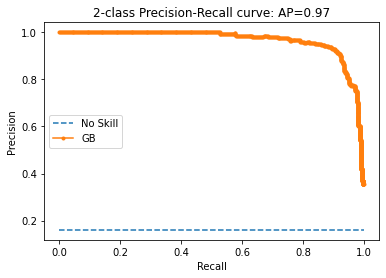

In [57]:
# summarize scores
# print('GB: f1=%.3f prauc=%.3f' % (f1_score, prauc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall_t, precision_t, marker='.', label='GB')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# show the legend
plt.legend()
plt.title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(precision_mean))

# show the plot
plt.show()

In [ ]:
def results_full(models, scaler, set_applied='validation'):
    """
    Function
    ----------
    Returns a dictionary of tuples of `model name` and a 
    dictionary of `metrics` for each model on the user-defined set
    
    Parameters
    ----------
    set_applied : str
        'validation' by default. The other option is 'test' or any other texts work as 'test'
    models : list of tuples
        List of tuples of all models of interest
    scaler : instantiation
        Instantiation of scaler of interest
        
    Returns
    -------
    results_dic : dict
        Dictionary of tuples of `model name` and a dictionary of `metrics` for each model
    """
    results, names = [], []
    scoring = ('accuracy', 'precision', 'recall', 'f1', 'roc_auc')
    for name, model in models:
        pipeline = Pipeline([('scaler', scaler),('m', model)])
        if set_applied=='validation':  # apply on validation sets
            cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)        
            results = cross_validate(
                pipeline, x_train, y_train, cv=cv, 
                scoring=scoring, return_train_score=True, n_jobs=-1)
        else:  # apply on test sets
            pipeline.fit(x_train, y_train)
            yhat = pipeline.predict(x_test)
            results = perf_metrics(y_test, yhat)            
        names.append(name)
        results.append(results)            
    results_dic = dict(zip(names, results))
    return results_dic

In [ ]:
def results_validation(models, scaler):
    
    """
    Function
    ----------
    Returns a dictionary of tuples of `model name` and a 
    dictionary of `metrics` for each model on the validation set
    (stratified 5-fold cross validation)
    
    Parameters
    ----------
    models : list of tuples
        List of tuples of all models of interest
    scaler : instantiation
        Instantiation of scaler of interest
        
    Returns
    -------
    results_dic : dict
        Dictionary of tuples of `model name` and a dictionary of `metrics` for each model
    """
    
    results = []
    names = []
    scoring = ('accuracy', 'precision', 'recall', 'f1', 'roc_auc')
    for name, model in models:
        pipeline = Pipeline([('scaler', scaler),('m', model)])
        # apply on cross validation sets generated by Stratified K Fold
        cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)        
        cv_results = cross_validate(
            pipeline, x_train, y_train, cv=cv, 
            scoring=scoring, return_train_score=True, n_jobs=-1)
        # create a list of model names
        names.append(name)
        # create a list of dictionaries of all metrics for each model
        results.append(cv_results)
    results_dic = dict(zip(names, results))
    return results_dic

In [ ]:
def results_test(models, scaler):
    
    """
    Function
    ----------
    Returns a dictionary of tuples of `model name` and a 
    dictionary of `metrics` for each model on the test set
    
    Parameters
    ----------
    models : list of tuples
        List of tuples of all models of interest
    scaler : instantiation
        Instantiation of scaler of interest
        
    Returns
    -------
    results_dic : dict
        Dictionary of tuples of `model name` and a dictionary of `metrics` for each model
    """
    
    results = []
    names = []
    scoring = ('accuracy', 'precision', 'recall', 'f1', 'roc_auc')
    for name, model in models:
        pipeline = Pipeline([('scaler', scaler),('m', model)])
        
        pipeline.fit(x_train, y_train)
        yhat = pipeline.predict(x_test)
        test_metrics = perf_metrics(y_test, yhat)
        # create a list of model names
        names.append(name)
        # create a list of dictionaries of all metrics for each model
        results.append(test_metrics)
    results_dic = dict(zip(names, results))
    return results_dic

<a id='5.3.1'>
    <h2 style='font-size:150%;'>
        Comment on <code>MinMaxScaler()</code></h2></a>

The `MinMaxScaler()` transforms each feature individually by bounding the minimum and maximum values of each feature to a given range, usually `0` and `1`. If negative values exist, the scaler will bound the values to `-1` and `1`. This Scaler responds well if **the standard deviation is small** and when a **distribution is not Gaussian**. As this scaler is **sensitive to outliers**, it is important to treat outliers beforehand. We will see the effects of Outlier Treatment in a later section.

[All About Feature Scaling, *Towards Data Science*](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)<br>
[Standardize or Normalize Examples in Python, *Medium*](https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc)